# SWMAL

## Setup of Yolov5 on GPU Cluster

Most packages are ready on the GPU Cluster when you are running under an Anaconda 2021.11.

We can finalize your setup both first cloning the Yolov5 git-repository

## <span style="color:red">NOTE: setup broken, fall 2023, under new Anaconda versions/new torch version!!</span>

In [ ]:
! (test ! -d yolov5 && git clone https://github.com/ultralytics/yolov5) || echo "Git-repository already cloned.."

and then `pip` installing the missing packages (that are incompatible with a `conda` install). 

First we install a specific set of packages for the `torch` framework that will work with even the newest GPUs (3090 RTX), and let this run for about 2 to 15 min (its slow to install):

In [ ]:
! pip install torch==1.10.1+cu111 torchvision==0.11.2+cu111 torchaudio==0.10.1 -f https://download.pytorch.org/whl/torch_stable.html

The we `pip` install whatever packages, that Yolov5 still needs  (since they are still incompatible with a `conda` install):

In [ ]:
! pip install -r yolov5_swmal_requirements.txt

You should now have the reqired setup for Yolov5, and I took care of installing specific GPU libraries needed for running Yolov5 on even the newest GPUs (3090). 

The user installed packages (found in you `~/.local/lib/python3.9/site-packages/` dir) now looks like:

In [ ]:
! pip list --user
! echo ; echo "DIR of local packages.." ; echo
! ls ~/.local/lib/python3.9/site-packages/

An now you can test out a demo of Yolov5 -- one that predicts on the image `Figs/zidane.jpg`:

In [1]:
import torch
import sys
    
def Versions():
    print("VERSIONS:")
    print(f"  sys.version                              = {sys.version}")
    print(f"  torch.__version__                        = {torch.__version__}")
   
    hasCuda = torch.cuda.is_available()
    print(f"  torch.cuda.is_available()                = {hasCuda}")
    if hasCuda:
        print(f"  torch.backends.cudnn.enabled             = {torch.backends.cudnn.enabled}")
        device = torch.device("cuda")
        print(f"  torch.cuda.get_device_properties(device) = {torch.cuda.get_device_properties(device)}")
        print(f"  torch.tensor([1.0, 2.0]).cuda()          = {torch.tensor([1.0, 2.0]).cuda()}")
        
Versions()

VERSIONS:
  sys.version                              = 3.9.12 | packaged by conda-forge | (main, Mar 24 2022, 23:25:59) 
[GCC 10.3.0]
  torch.__version__                        = 1.12.1
  torch.cuda.is_available()                = False


In [2]:
def PredictDemo():
    # Model
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x, custom

    # Images
    #img = 'https://ultralytics.com/images/zidane.jpg'  # or file, Path, PIL, OpenCV, numpy, list
    img = 'Figs/zidane.jpg'

    # Inference
    results = model(img)

    # Results
    results.print()  # or .show(), .save(), .crop(), .pandas(), etc.
    #results.show()
    results.save('temp.jpg')

    
#Versions()
PredictDemo()
print("OK")

Using cache found in /home/cef/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-8-8 Python-3.9.12 torch-1.12.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 720x1280 2 persons, 2 ties
Speed: 22.6ms pre-process, 154.1ms inference, 1.1ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to runs/detect/exp


OK


If succefull an output prediction image will be placed in the temp.jpg/ or in runs/detect/expNN so look for the output line from the cell, similar to

```
VERSIONS:
  sys.version                              = 3.9.7 ...
  torch.__version__                        = 1.11.0+cpu
  torch.cuda.is_available()                = False

Using cache found in C:\Users\au204573/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-4-3 torch 1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 720x1280 2 persons, 2 ties
Speed: 31.6ms pre-process, 298.2ms inference, 2.2ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to temp.jpg
```

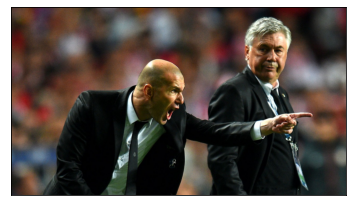

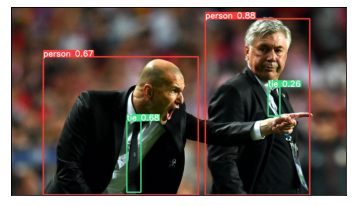

In [6]:
%matplotlib inline

from matplotlib import pyplot as plt
import cv2

def ShowImg(imgfilename):
    img = cv2.imread(imgfilename, 1)
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Converts from one colour space to the other

    plt.imshow(img2)
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()
    

ShowImg('Figs/zidane.jpg')
ShowImg('runs/detect/exp/zidane.jpg')

REVISIONS||
:- | :- |
2022-??-??| CEF, initial version, clone from [HOML].
2023-10-12| CEF, added note on broken setup, needs check of new Anaconda and PyTorch versions.